***Girish Palya***

>**Task 2**
Taxation is often associated with something which is destroying the economy. However, taxing goods whose consumption generates external costs can be profitable for the whole economy. You just need to carry out a cost benefit analysis.   
The problem is to find the optimal level of taxation.  
Storytelling applies to the XYZ good [You will know the full storytelling on the exam ]   
Let's assume that the model of perfectly competitive market is a good approximation of market conditions:

\begin{align}
q_{d} = 1000 - 5p\\
q_{s} = -250 + 2p\\
q_{d} = q_{s}
\end{align}

>Consumption of 1 unit of this good generates the external cost EC, which can be approximated by the function EC = 10$q_{d}$ + 0.01$q_{d}^{2}$.


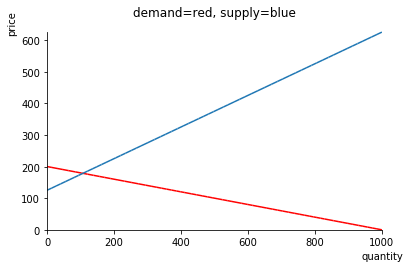

In [55]:
%matplotlib inline
import sympy as sym
from sympy.plotting import plot

q_d, q_s, p_d, p_s = sym.symbols('q_d q_s p_d p_s')

Eq_d = 1000 - (5 * p_d) - q_d
Eq_s = -250 + (2 * p_s) - q_s
Eq_eqm_q = q_d - q_s
Eq_eqm_p = p_d - p_s
EC = (10 * q_d) + ((0.01) * (q_d**2))

# demand curve
Price_d = sym.solveset(Eq_d, p_d).args[0]
pl = plot(Price_d, (q_d, 0, 1000), xlabel='quantity', ylabel='price', show=False, line_color='red', \
          title='demand=red, supply=blue')

# supply curve
Price_s = sym.solveset(Eq_s, p_s).args[0]
pl.extend(plot(Price_s, (q_s, 0, 1000), show=False))
pl.show()

>a) Calculate the equilibrium condition without regulation, also specify the external EC costs. (2p)


In [61]:
solution_e = sym.solve((Eq_d, Eq_s, Eq_eqm_q, Eq_eqm_p), (p_d, p_s, q_d, q_s))
print(f'At equilibrium: price p = {solution_e[p_d]} ({solution_e[p_d].evalf(5)}), quantity q = {solution_e[q_d]} ({solution_e[q_d].evalf(5)})')
print(f'External Cost: {EC.subs(q_d, solution_e[q_d]).evalf(6)}')

At equilibrium: price p = 1250/7 (178.57), quantity q = 750/7 (107.14)
External Cost: 1186.22


>b) The government wants to impose ad valorem tax (t) on this good. Specify tax effects on:


In [35]:
# ad valorem tax
t = sym.Symbol('t')
Eq_tax = p_d - (1 + t) * p_s
s = sym.solve((Eq_d, Eq_s, Eq_eqm_q, Eq_tax), (p_d, p_s, q_d, q_s))
print(f'Ad valorem tax: ')
print(f'price_supplier = {s[p_s]}, price_demander = {s[p_d]}, quantity = {s[q_d]}')

Ad valorem tax: 
price_supplier = 1250/(5*t + 7), price_demander = 1250*(t + 1)/(5*t + 7), quantity = 250*(3 - 5*t)/(5*t + 7)


>b1) Generated EC external cost. Determine the dependence of EC = f(t) - the amount of the external cost as a function of the tax rate t. Draw an approximate graph of this function. (3p)



In [31]:
EC_t = EC.subs(q_d, s[q_d])
EC_t

625.0*(3 - 5*t)**2/(5*t + 7)**2 + 2500*(3 - 5*t)/(5*t + 7)

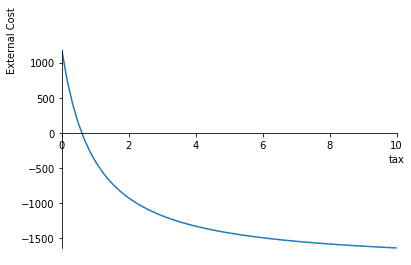

For tax = 3/5 cost is zero


In [32]:
plot(EC_t, (t, 0, 10), xlabel='tax', ylabel='External Cost')
print(f'For tax = {sym.solveset(EC_t, t).args[1]} cost is zero')

As tax increases, external cost becomes negative (benefit). It levels out after horizontally eventually (no additional benefit after a certain amount of taxation. Here tax t is defined as a ratio (t=2 means 200% tax, etc). Cost is zero for tax = 3/5 (60%).

>b2) Tax revenue T. Determine the dependence of T = f (t) tax revenue as a function of the tax rate t. Draw an approximate graph of this function. (3p)



In [34]:
# Tax_Revenue = quantity * price_supplier * tax_rate
Tax_Revenue = s[q_d] * s[p_s] * t
Tax_Revenue

312500*t*(3 - 5*t)/(5*t + 7)**2

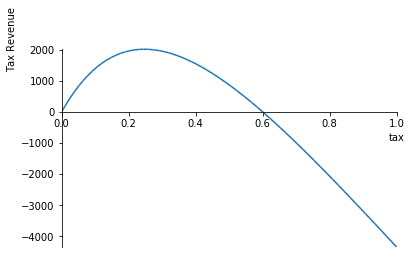

In [38]:
plot(Tax_Revenue, (t, 0, 1), xlabel='tax', ylabel='Tax Revenue')

In [51]:
# Find max tax revenue
tax_m = sym.solveset(sym.diff(Tax_Revenue, t), t).evalf(3).args[0]
print(f'At the tax rate of {tax_m}, tax revenue is maximum')
print(f'Max Tax Revenue = {Tax_Revenue.subs(t, tax_m).evalf(5)}')

At the tax rate of 0.247, tax revenue is maximum
Max Tax Revenue = 2009.5


>b3) Social welfare. Define the dependence SW = f (t). Social Welfare as a function of the tax rate. SW is the sum of tax revenues (T), Producer Surplus (PS), Consumer Surplus (CS) with included External Costs (EC) SW = T + CS + PS - EC. Draw an approximate graph of this function. (3p)


In [113]:

# Price (supply and demand) when quantity=0
p_d_0 = sym.solveset(Eq_d, p_d).subs(q_d, 0).args[0]
p_s_0 = sym.solveset(Eq_s, p_s).subs(q_s, 0).args[0]

# This method also works:
# # In the absense of tax, say CS_plus_PS is the area of triangle formed by p_d_0 and p_s_0 and quantity at equilibrium
# CS_plus_PS_notax = 0.5 * (p_d_0 - p_s_0) * solution_e[q_d]
# # dead_weight_loss = 1/2 * amount_of_tax * quanity
# dead_weight_loss = 0.5 * (t * s[p_s]) * (solution_e[q_s] - s[q_s])
# TaxRevenue_plus_CS_plus_PS = CS_plus_PS_notax - dead_weight_loss
# # social welfare
# SW = TaxRevenue_plus_CS_plus_PS - EC_t
# SW = sym.simplify(SW)

# XXX: following is wrong, the 2 trapeziods are not mirror images, demand line and supply line have different slope
CS = 0.5 * (p_d_0 - s[p_d]) * s[q_d]
PS = 0.5 * (s[p_s] - p_s_0) * s[q_d]
SW = Tax_Revenue + PS + CS - EC_t
SW = sym.simplify(SW)
SW

-(5*t - 3)*(193750.0*t + 46250.0)/(5*t + 7)**2

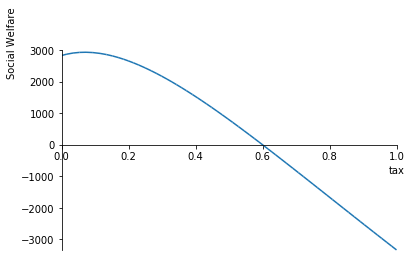

In [114]:
plot(SW, (t, 0, 1), xlabel='tax', ylabel='Social Welfare')

>c) Based on point b, find the optimal level of taxation:



>c1) If the government does not include external costs in its accounts and maximizes only tax revenues. (3p)


In [119]:
SW = Tax_Revenue + PS + CS
SW = sym.simplify(SW)
print(f'Social Welfare not including external costs:')
SW

Social Welfare not including external costs:


-250*(5*t - 3)*(812.5*t + 262.5)/(5*t + 7)**2

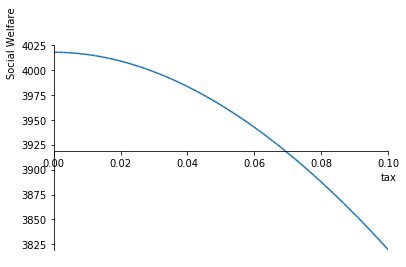

In [120]:
plot(SW, (t, 0, 0.1), xlabel='tax', ylabel='Social Welfare')

In [121]:
df = sym.diff(SW, t)
tax_optimum = sym.solve(sym.simplify(df),t)[0]
print(f'Optimum tax = {tax_optimum}')

Optimum tax = 0.0


Optimum tax of 0 is to be expected. For any other positive value of tax we will have Dead Weight Loss associated with tax. Dead Weight Loss subtracts from Social Welfare.

>c2) If the government wants to equalize the tax revenues T with the external EC costs. The tax revenues intended to eliminate the consequences of the consumption of this good. (3p)


In [123]:
sym.solve((Tax_Revenue - EC_t), t)

[0.0639175257731959, 0.600000000000000]

We have 2 values for tax, as above. However, at t=0.6, quantity available would be zero. So this is not realistic. The optimum tax would be **0.0639175257731959**. Tax revenue would be 999.31.

>c3) If the government maximizes social welfare, SW = T + CS + PS - EC. (3p)


In [140]:
SW = Tax_Revenue + PS + CS - EC_t
SW = sym.simplify(SW)
df = sym.diff(SW, t)
tax_optimum = sym.solve(sym.simplify(df), t)[0]
print(f'Optimum tax = {tax_optimum}')

Optimum tax = 0.0693877551020408


>c4) The government takes over the production of this good as a monopoly. The marginal and average costs of production are the same MC = ATC = 10. Profits of the state monopolistic firm become the revenues of the state budget. (4p)


In this case, cost = 10 * quantity

In [159]:
cost = 10 * q_d
# profit maximization
profit = (p_d * q_d) - cost
price_eq = sym.solveset(Eq_d, p_d).args[0]
profit = profit.subs(p_d, price_eq)
profit

q_d*(200 - q_d/5) - 10*q_d

In [170]:
df = sym.diff(profit, q_d)
quantity_s = sym.solve(df, q_d)[0]
print(f'Quantity of goods (state monopoly maximising profits): {quantity_s}, profit: {profit.subs(q_d, quantity_s)}')
print(f'price: {price_eq.subs(q_d, quantity_s)}')
profit_per_unit = profit.subs(q_d, quantity_s) / quantity_s
print(f'Tax/profit (per unit): {profit_per_unit}')
print(f'Tax (ad valorem): {(profit_per_unit / 10).evalf(2)}') # 10 is the marginal cost

Quantity of goods (state monopoly maximising profits): 475, profit: 45125
price: 105
Tax/profit (per unit): 95
Tax (ad valorem): 9.5


>d) Analyze the obtained results. Determine the impact of different tax optimization policies applied by the government on this market. (6p)



>e) Based on the analysis of the tax policy ..... (a fragment of the real report will be given on the exam). Determine if such a simplified model can be useful for analyzing such problems. Skip the discussions of the reality of parameters, and focus on the reality of the behaviour of this model. Is it possible to use a market solution in this case? Can Coase theorem be applied to this example? (9p)